# Rain in Australia dataset:

Predicting the future of the weather is vital for individuals and organizations for various reasons. This dataset contains about 10 years of daily weather observations from many locations across Australia. It contains 145K rows and 23 features correlated to weather conditions. This is a classification problem to predict whether it will rain in Australia the next day or not. RainTomorrow is the target variable. It has values ‘Yes’ and ‘No’.

Notebook 3, Preprocesssing of Rain in Australia dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("./drive/MyDrive/Colab_Notebooks/MLDM_project/")

In [ ]:
print(os.listdir("input_data/"))

['weatherAUS.csv', 'data.csv', 'rain_train.npy', 'rain_test.npy', 'bankruptcy_train_imbalanced.npy', 'bankruptcy_train.npy', 'bankruptcy_train_train.npy', 'bankruptcy_train_val.npy', 'bankruptcy_test.npy']


### Dataset loading and Analysis

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 10.3MB/s eta 0:00:01


In [ ]:
import pandas as pd
import numpy as np
import random as rn
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import warnings
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_addons as tfa
from sklearn import svm
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
aus_df = pd.read_csv('input_data/weatherAUS.csv')

In [ ]:
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
aus_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
aus_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
aus_df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [ ]:
#pip install missingno

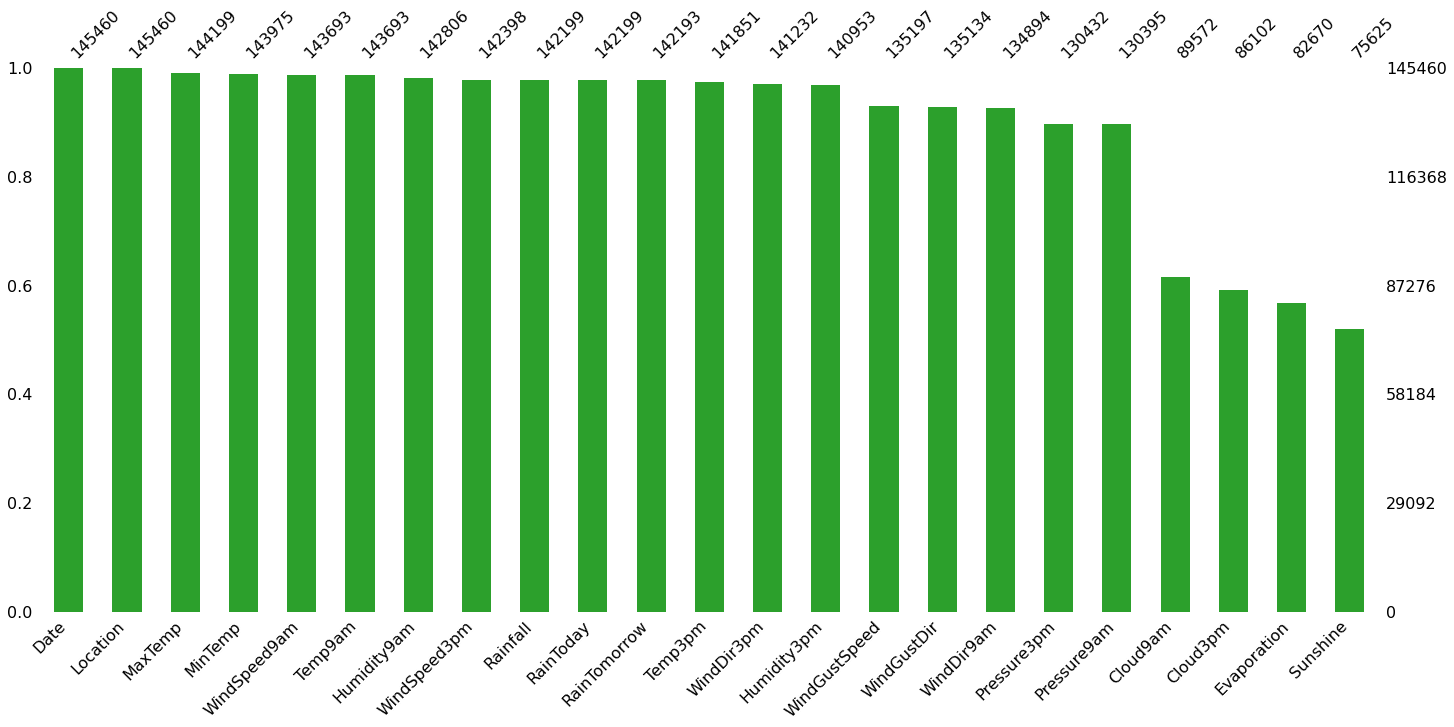

In [ ]:
import missingno as msno
msno.bar(aus_df, sort= 'descending', color="tab:green")

From the above graph we infer that Cloud9am, Cloud3pm, Evaporation and Sunshine have a lot of missing values.

In [ ]:
#converting date to date-time format and splitting into Day, month and year

aus_df['Date'] = pd.to_datetime(aus_df['Date'])
aus_df['Day'] = aus_df['Date'].dt.day
aus_df['Month'] = aus_df['Date'].dt.month
aus_df['Year'] = aus_df['Date'].dt.year

In [ ]:
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [ ]:
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
# Drop the original Date variable from the dataset

aus_df.drop('Date', axis=1, inplace = True)

In [ ]:
aus_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [ ]:
# Slpitting the dataset into categorical and numerical values

categorical = [var for var in aus_df.columns if aus_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical = [var for var in aus_df.columns if aus_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


### Handling missing values

In [ ]:
aus_df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Day                  0
Month                0
Year                 0
dtype: int64

#### Categorical variables

In [ ]:
# There are no missing values in Location, Day, Month and Year variables

# WindGustDir

# Check for unique values
aus_df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

There are 16 unique values and nan values

In [ ]:
# Check for count of each unique value
aus_df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [ ]:
# Handling the missing values by replacing with the most frequent values
aus_df['WindGustDir'].fillna(aus_df['WindGustDir'].mode()[0], inplace=True)
aus_df.WindGustDir.isnull().sum()

0

In [ ]:
# WindDir9am

# Check for unique values
aus_df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

There are 16 unique values and nan values

In [ ]:
# Check for count of each unique value
aus_df.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [ ]:
# Handling the missing values by replacing with the most frequent values
aus_df['WindDir9am'].fillna(aus_df['WindDir9am'].mode()[0], inplace=True)
aus_df.WindDir9am.isnull().sum()

0

In [ ]:
# WindDir3pm

# Check for unique values
aus_df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

There are 16 unique values and nan values

In [ ]:
# Check for count of each unique value
aus_df.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [ ]:
# Handling the missing values by replacing with the most frequent values
aus_df['WindDir3pm'].fillna(aus_df['WindDir3pm'].mode()[0], inplace=True)
aus_df.WindDir3pm.isnull().sum()

0

In [ ]:
# RainToday

# Check for unique values
aus_df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

The RainToday variable has 2 unique values and nan values

In [ ]:
# Check for count of each unique value
aus_df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [ ]:
# Handling the missing values by replacing with the most frequent values
aus_df['RainToday'].fillna(aus_df['RainToday'].mode()[0], inplace=True)
aus_df.RainToday.isnull().sum()

0

In [ ]:
# RainTomorrow

# Check for unique values
aus_df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

The RainTomorrow variable has 2 unique values and nan values

In [ ]:
# Check for count of each unique value
aus_df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
# Handling the missing values by replacing with the most frequent values
aus_df['RainTomorrow'].fillna(aus_df['RainTomorrow'].mode()[0], inplace=True)
aus_df.RainTomorrow.isnull().sum()

0

In [ ]:
aus_df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Numerical variables

In [ ]:
# Checking missing values in numerical variables

aus_df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Day                  0
Month                0
Year                 0
dtype: int64

In [ ]:
for i in aus_df:
    if aus_df[i].dtype=='float64':
        aus_df[i].replace(to_replace=np.nan, value=aus_df[i].median(), inplace=True)
    else:
        continue

In [ ]:
aus_df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

### Data Visualisation and Analysis

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


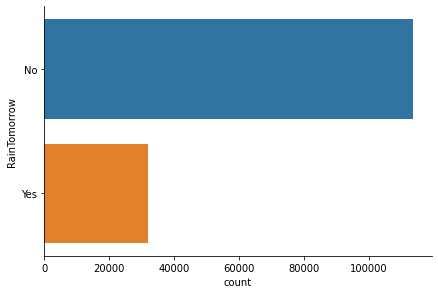

In [ ]:
# check for imbalance among target variables
print(aus_df.RainTomorrow.value_counts())

#plotting the label count
ax = sns.catplot(y="RainTomorrow",kind='count', data=aus_df, height=4, aspect=12/8)

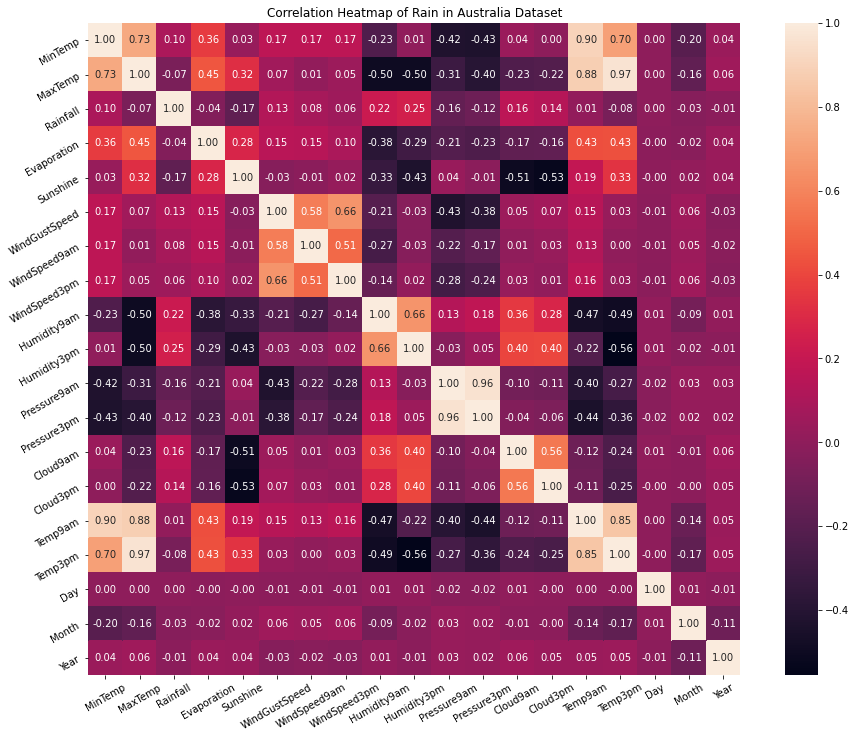

In [ ]:
correlation = aus_df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

From the correlation matrix we can infer the below,

1. MinTemp and MaxTemp features are highly correlated (correlation coefficient = 0.73) 
2. MinTemp and Temp9am features are highly correlated (correlation coefficient = 0.90) 
3. MinTemp and Temp3pm features are highly correlated (correlation coefficient = 0.70)
4. Pressure9am and Pressure3pm features are highly correlated (correlation coefficient = 0.96) 
5. Temp9am and Temp3pm features are highly correlated (correlation coefficient = 0.85) 
6. MaxTemp and Temp9am features are highly correlated (correlation coefficient = 0.88) 
7. MaxTemp and Temp3pm features are highly correlated (correlation coefficient = 0.97) 


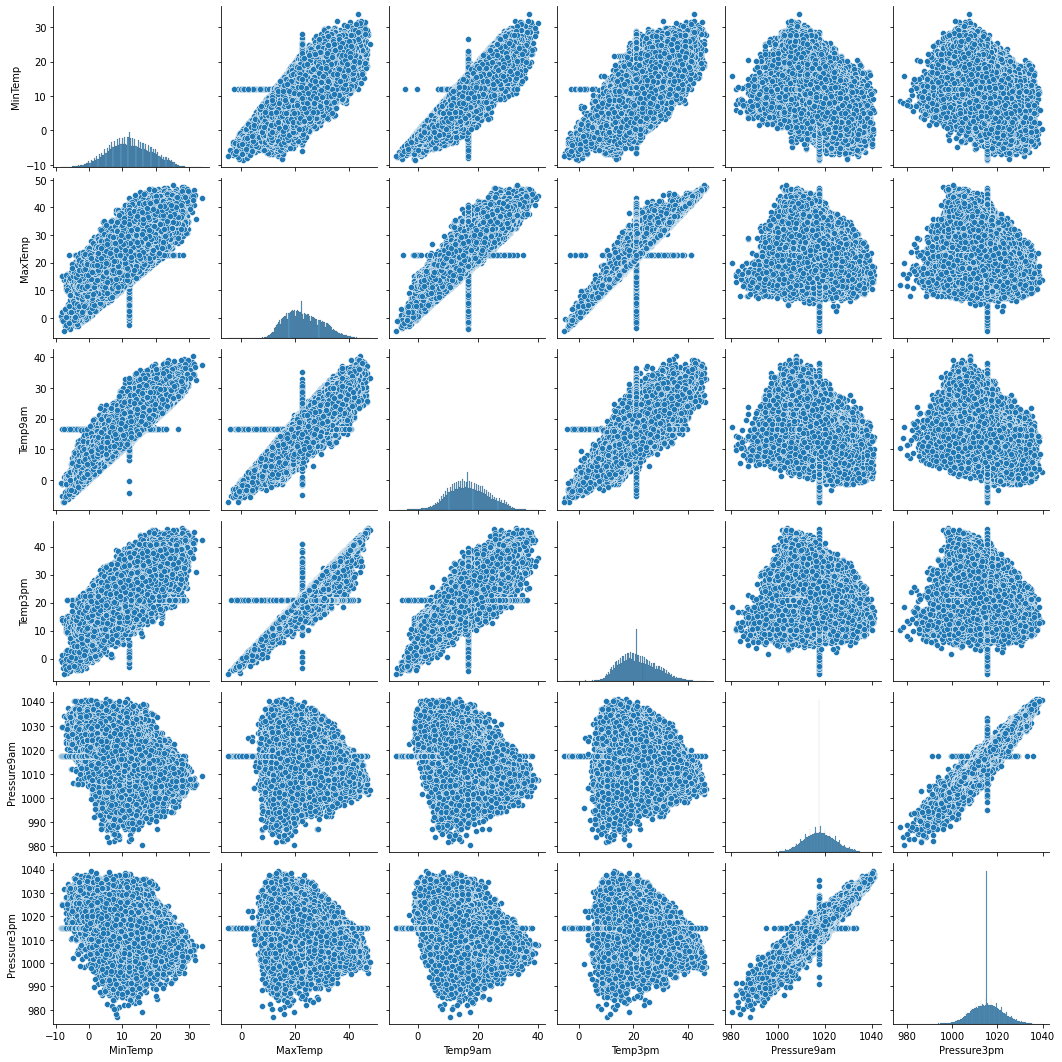

In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(aus_df[num_var], kind = 'scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [ ]:
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

### Handling Outliers

In [ ]:
# checking for presence of any outliers in the numerical variables

print(round(aus_df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...       Day     Month      Year
count  145460.0  145460.0  145460.0  ...  145460.0  145460.0  145460.0
mean       12.0      23.0       2.0  ...      16.0       6.0    2013.0
std         6.0       7.0       8.0  ...       9.0       3.0       3.0
min        -8.0      -5.0       0.0  ...       1.0       1.0    2007.0
25%         8.0      18.0       0.0  ...       8.0       3.0    2011.0
50%        12.0      23.0       0.0  ...      16.0       6.0    2013.0
75%        17.0      28.0       1.0  ...      23.0       9.0    2015.0
max        34.0      48.0     371.0  ...      31.0      12.0    2017.0

[8 rows x 19 columns] 2


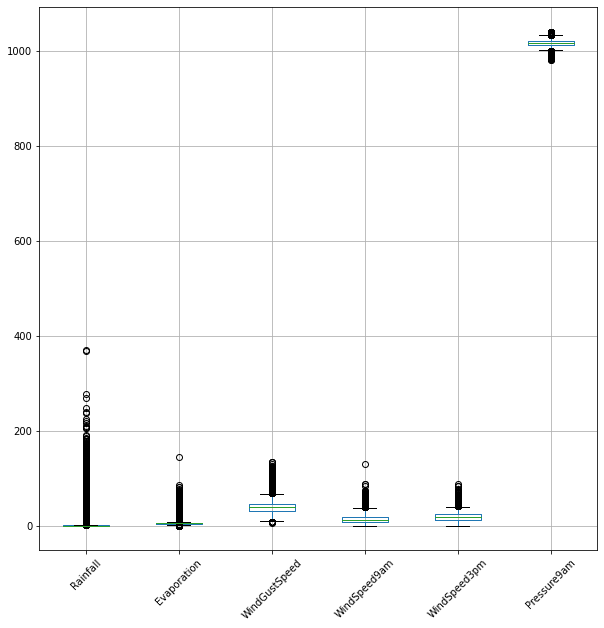

In [ ]:
# box-plots to visualize outliers

plt.figure(figsize=[10,10])
aus_df.boxplot(column= ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
for i in aus_df:
    if aus_df[i].dtype=='float64':
        q1 = aus_df[i].quantile(0.25)
        q3 = aus_df[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(aus_df[i])
        for j in aus_df[i]:
            if j > Upper_tail or j < Lower_tail:
                aus_df[i] = aus_df[i].replace(j, med)
    else:
        continue

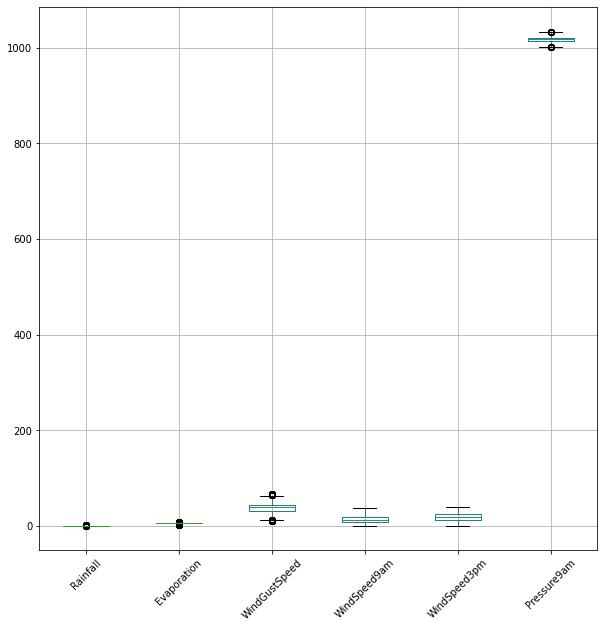

In [ ]:
plt.figure(figsize=[10,10])
aus_df.boxplot(column= ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am'])
plt.xticks(rotation=45)
plt.show()

### Splitting the target variable

In [ ]:
aus_df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
aus_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0,1,12,2008
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0,2,12,2008
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0,3,12,2008
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,0,4,12,2008
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,0,21,6,2017
145456,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,0,22,6,2017
145457,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,0,23,6,2017
145458,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0,24,6,2017


In [ ]:
# Splitting the target variable 'RainTomorrow' from the dataset

X = aus_df.drop(['RainTomorrow'], axis=1)
y = aus_df['RainTomorrow']

### Splitting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

X_train_imbal, X_test, y_train_imbal, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30, stratify=y)

In [ ]:
X_train_imbal.shape, X_test.shape

((116368, 24), (29092, 24))

### Label encoding

In [ ]:
!pip install category_encoders

In [ ]:
# Encoding RainToday variable using BinaryEncoder

import category_encoders as en

encoder = en.BinaryEncoder(cols=['RainToday'])

X_train_imbal = encoder.fit_transform(X_train_imbal)
X_test = encoder.transform(X_test)


In [ ]:
X_train_imbal.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Day,Month,Year
74491,Nhil,21.5,42.1,0.0,4.8,8.4,WSW,65.0,NNE,W,15.0,31.0,30.0,12.0,1011.0,1008.4,5.0,5.0,27.3,40.1,0,1,23,2,2016
26310,Penrith,18.5,28.2,0.0,4.8,8.4,E,22.0,SSE,N,6.0,6.0,81.0,52.0,1017.6,1015.2,5.0,5.0,21.9,27.5,1,0,20,2,2015
129457,Walpole,9.5,15.4,0.0,4.8,8.4,ESE,30.0,ENE,ENE,11.0,11.0,96.0,84.0,1027.4,1026.7,5.0,5.0,11.8,13.5,1,0,10,6,2016
120376,PerthAirport,14.7,24.7,0.2,3.0,8.7,N,37.0,NNE,WNW,24.0,22.0,76.0,50.0,1012.9,1009.6,6.0,6.0,18.8,24.2,0,1,7,10,2016
67454,Melbourne,18.2,25.2,0.0,4.8,8.4,N,59.0,NNW,N,13.0,19.0,78.0,60.0,1019.2,1017.2,8.0,7.0,20.3,23.6,1,0,12,3,2009


In [ ]:
X_train_imbal = pd.concat([X_train_imbal[numerical], X_train_imbal[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train_imbal.Location), 
                     pd.get_dummies(X_train_imbal.WindGustDir),
                     pd.get_dummies(X_train_imbal.WindDir9am),
                     pd.get_dummies(X_train_imbal.WindDir3pm)], axis=1)

In [ ]:
X_train_imbal.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
74491,21.5,42.1,0.0,4.8,8.4,65.0,15.0,31.0,30.0,12.0,1011.0,1008.4,5.0,5.0,27.3,40.1,23,2,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26310,18.5,28.2,0.0,4.8,8.4,22.0,6.0,6.0,81.0,52.0,1017.6,1015.2,5.0,5.0,21.9,27.5,20,2,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
129457,9.5,15.4,0.0,4.8,8.4,30.0,11.0,11.0,96.0,84.0,1027.4,1026.7,5.0,5.0,11.8,13.5,10,6,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120376,14.7,24.7,0.2,3.0,8.7,37.0,24.0,22.0,76.0,50.0,1012.9,1009.6,6.0,6.0,18.8,24.2,7,10,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
67454,18.2,25.2,0.0,4.8,8.4,59.0,13.0,19.0,78.0,60.0,1019.2,1017.2,8.0,7.0,20.3,23.6,12,3,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
65037,7.5,14.6,0.0,4.8,8.4,30.0,17.0,15.0,83.0,68.0,1021.6,1020.6,7.0,7.0,10.6,14.0,27,5,2011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3727,14.7,18.1,0.0,4.8,8.4,50.0,24.0,13.0,73.0,62.0,1022.9,1024.3,5.0,5.0,16.0,17.8,19,11,2010,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
111923,6.7,24.8,0.0,4.8,8.4,39.0,11.0,24.0,59.0,48.0,1021.7,1017.0,5.0,5.0,18.3,22.1,9,11,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9631,14.2,17.9,0.0,5.4,8.4,50.0,20.0,17.0,94.0,85.0,1028.1,1023.0,8.0,8.0,15.9,17.9,28,7,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
61743,8.1,13.5,0.4,4.8,8.4,43.0,15.0,19.0,83.0,70.0,1026.9,1025.6,6.0,7.0,10.0,12.4,16,7,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns = X_train_imbal.columns

scaler = MinMaxScaler()
X_train_imbal = scaler.fit_transform(X_train_imbal)
X_test = scaler.transform(X_test)

In [ ]:
X_train_imbal = pd.DataFrame(X_train_imbal, columns=[columns])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[columns])

In [ ]:
X_train_imbal.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.499956,0.502199,0.055212,0.517732,0.479797,0.509285,0.368933,0.467026,0.627410,0.515592,0.502160,0.501110,0.517978,0.485064,0.501309,0.505463,0.490495,0.490528,0.576871,0.218995,0.781005,0.021905,0.020487,0.020830,0.020934,0.020616,0.020607,0.020985,0.021655,0.020925,0.023658,0.020959,0.020830,0.020624,0.022171,0.021011,0.021802,0.010896,0.020942,0.021879,...,0.063377,0.065198,0.063737,0.059767,0.061159,0.138638,0.056339,0.062448,0.063299,0.053614,0.052471,0.153135,0.053064,0.056528,0.054577,0.060240,0.059432,0.063780,0.062397,0.052016,0.057662,0.058006,0.051139,0.048639,0.058152,0.054267,0.058934,0.060979,0.056519,0.045262,0.054225,0.058779,0.067587,0.103577,0.065095,0.056167,0.064159,0.069418,0.061649,0.065233
std,0.175435,0.170981,0.164957,0.168968,0.095182,0.185082,0.220070,0.203012,0.219949,0.205009,0.185903,0.185713,0.253473,0.238726,0.174157,0.175019,0.292989,0.311435,0.253746,0.413567,0.413567,0.146373,0.141659,0.142817,0.143163,0.142094,0.142065,0.143335,0.145556,0.143134,0.151981,0.143249,0.142817,0.142123,0.147240,0.143421,0.146036,0.103816,0.143191,0.146289,...,0.243640,0.246877,0.244286,0.237056,0.239624,0.345570,0.230575,0.241969,0.243501,0.225256,0.222977,0.360119,0.224163,0.230939,0.227153,0.237932,0.236433,0.244362,0.241876,0.222060,0.233104,0.233755,0.220283,0.215113,0.234031,0.226546,0.235502,0.239293,0.230922,0.207878,0.226461,0.235212,0.251037,0.304712,0.246695,0.230244,0.245036,0.254164,0.240518,0.246937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375691,0.373464,0.000000,0.541667,0.473684,0.379310,0.189189,0.333333,0.487805,0.370000,0.383686,0.380665,0.333333,0.500000,0.376022,0.377309,0.233333,0.181818,0.

In [ ]:
X_train_train_imbal, X_train_val, y_train_train_imbal, y_train_val = train_test_split(X_train_imbal, y_train_imbal, test_size=0.20, random_state=30, stratify=y_train_imbal)

### Handling Data imbalance using SMOTE

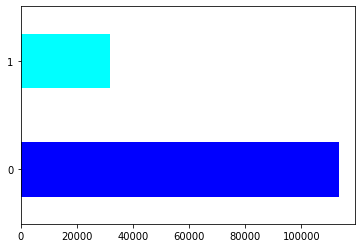

In [ ]:
aus_df['RainTomorrow'].value_counts().plot(kind='barh',color=['blue', 'cyan'])

In [ ]:
#pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 37) 
X_train, y_train = sm.fit_resample(np.array(X_train_imbal), y_train_imbal.ravel())
X_train_train, y_train_train = sm.fit_resample(X_train_train_imbal, y_train_train_imbal)
from collections import Counter

print("Before {}".format(Counter(y_train_imbal)))
print("After {}".format(Counter(y_train)))

In [ ]:
len(X_train_val)

23274

In [ ]:
#Combine X and y
preprocessed_train = np.concatenate([X_train, y_train.reshape(181732,-1)], axis=1)
preprocessed_test = np.concatenate([np.array(X_test), np.array(y_test).reshape(29092,-1)], axis=1)
preprocessed_train_train = np.concatenate([X_train_train, y_train_train.reshape(145384,-1)], axis=1)
preprocessed_train_val = np.concatenate([X_train_val, np.array(y_train_val).reshape(23274,-1)], axis=1)

In [ ]:
#Save into .npy
np.save('input_data/rain_train.npy', preprocessed_train)
np.save('input_data/rain_test.npy', preprocessed_test)
np.save('input_data/rain_train_train.npy', preprocessed_train_train)
np.save('input_data/rain_train_val.npy', preprocessed_train_val)

In [ ]:
train_data = np.load('input_data/rain_train.npy')
test_data = np.load('input_data/rain_test.npy')
X_train = train_data[:,:-1]
y_train = np.reshape(train_data[:,-1], (181732,1))
X_test = test_data[:,:-1]
y_test = test_data[:,-1]